<a href="https://colab.research.google.com/github/ASTHA22/Hatespeech-detection-using-different-ml-deep-learning-techniques/blob/main/Special_topics_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary libraries
import requests
import pandas as pd

In [2]:
#import dataset
url = 'https://drive.google.com/uc?export=download&id=1F3oU61kC2ZqQ9HJLKAmoblehs3ENgUl8'
r = requests.get(url, headers = {'Accept': 'application/text'})
with open('data.csv', "w") as f:
    f.write(r.text)

In [3]:
#saving dataset into a dataframe to perform functions
df = pd.read_csv("data.csv", sep=',')
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
#import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [5]:
# Step 1: Data Exploration and Analysis (EDA)
print(df.head())
print(df['class'].value_counts())


   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  
1    19190
2     4163
0     1430
Name: class, dtype: int64


In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 2: Data Preprocessing

# Download 'punkt' and 'stopwords' resources
nltk.download('punkt')
nltk.download('stopwords')

# Convert text to lowercase
df['clean_text'] = df['tweet'].str.lower()
df['clean_text'] = df['clean_text'].apply(lambda x: x.replace('rt', ''))

# Remove URLs
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove special characters and punctuations
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Tokenization
df['tokenized_text'] = df['clean_text'].apply(lambda x: word_tokenize(x))

# Remove stop words
stop_words = set(stopwords.words('english'))
df['filtered_text'] = df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])

# Perform stemming
stemmer = nltk.SnowballStemmer(language='english')
df['stemmed_text'] = df['filtered_text'].apply(lambda x: [stemmer.stem(word) for word in x])

# Create a new column for preprocessed text
df['preprocessed_text'] = df['stemmed_text'].apply(lambda x: ' '.join(x))





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
df['preprocessed_text'] = df['preprocessed_text']
df['preprocessed_text_ml'] = df['preprocessed_text'].apply(lambda x: x.split())

In [8]:
# Step 3: Feature Engineering
# TF-IDF Vectorization
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['preprocessed_text'])
y = df['class']

In [9]:
# Perform train-test split separately for each model (To avoid class imbalance)
from sklearn.model_selection import train_test_split

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
model_lr = LogisticRegression(verbose=1, solver='liblinear', random_state=0, C=5, penalty='l2', max_iter=100)

# Fit the model to the training data
model_lr.fit(X_train_lr, y_train_lr)

# Make predictions on the test data
y_pred_lr = model_lr.predict(X_test_lr)

# Evaluate the model performance
accuracy_lr = accuracy_score(y_test_lr, y_pred_lr)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model to the training data
rf_model.fit(X_train_rf, y_train_rf)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluate the model performance
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)

# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Create the Multinomial Naive Bayes classifier
nb_model = MultinomialNB(alpha=1.0)

# Fit the model to the training data
nb_model.fit(X_train_nb, y_train_nb)

# Make predictions on the test data
y_pred_nb = nb_model.predict(X_test_nb)

# Evaluate the model performance
accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)

# SVM
from sklearn.svm import SVC

# Create the SVM classifier
svm_model = SVC(kernel='linear', C=1, random_state=0)

# Fit the model to the training data
svm_model.fit(X_train_svm, y_train_svm)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluate the model performance
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)

# Print accuracy for each model
print("Logistic Regression Accuracy:", accuracy_lr)
print("Random Forest Classifier Accuracy:", accuracy_rf)
print("Multinomial Naive Bayes Classifier Accuracy:", accuracy_nb)
print("SVM Classifier Accuracy:", accuracy_svm)


[LibLinear]Logistic Regression Accuracy: 0.8910631430300585
Random Forest Classifier Accuracy: 0.8884405890659673
Multinomial Naive Bayes Classifier Accuracy: 0.7962477304821465
SVM Classifier Accuracy: 0.9007464192051644


In [12]:
# Print classification report for each model
from sklearn.metrics import classification_report

# Print classification report for each model with zero_division=1
print("Logistic Regression Classification Report:")
print(classification_report(y_test_lr, y_pred_lr, zero_division=1))

print("Random Forest Classification Report:")
print(classification_report(y_test_rf, y_pred_rf, zero_division=1))

print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test_nb, y_pred_nb, zero_division=1))

print("SVM Classification Report:")
print(classification_report(y_test_svm, y_pred_svm, zero_division=1))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.19      0.28       290
           1       0.91      0.96      0.94      3832
           2       0.83      0.83      0.83       835

    accuracy                           0.89      4957
   macro avg       0.75      0.66      0.68      4957
weighted avg       0.88      0.89      0.88      4957

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.10      0.18       290
           1       0.90      0.97      0.93      3832
           2       0.85      0.78      0.81       835

    accuracy                           0.89      4957
   macro avg       0.78      0.62      0.64      4957
weighted avg       0.87      0.89      0.87      4957

Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       290
  

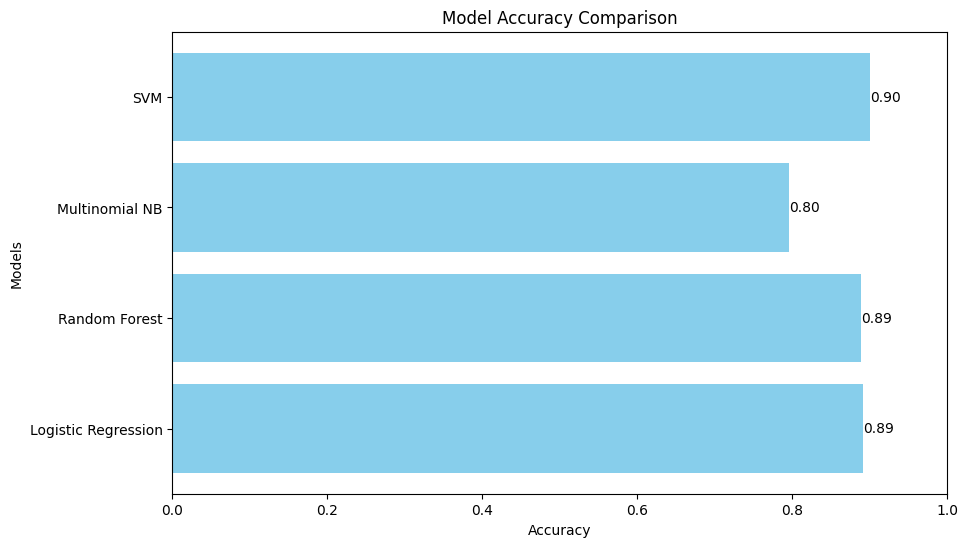

In [17]:
#graphical comparison of all models
import matplotlib.pyplot as plt
import numpy as np

# List of models and their accuracies
models = ['Logistic Regression', 'Random Forest', 'Multinomial NB', 'SVM']
accuracies = [accuracy_lr, accuracy_rf, accuracy_nb, accuracy_svm]

# Create a horizontal bar plot for model accuracy
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # Set the x-axis limits from 0 to 1

# Add accuracy values on the bars
for index, value in enumerate(accuracies):
    plt.text(value, index, f"{value:.2f}", ha='left', va='center')

plt.show()


In [16]:
#Tabular comparison of all models
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# List of models and their corresponding metrics
models = ['Logistic Regression', 'Random Forest', 'Multinomial NB', 'SVM']
accuracy = [accuracy_lr, accuracy_rf, accuracy_nb, accuracy_svm]
precision = [precision_score(y_test_lr, y_pred_lr, average='weighted', zero_division=1),
             precision_score(y_test_rf, y_pred_rf, average='weighted', zero_division=1),
             precision_score(y_test_nb, y_pred_nb, average='weighted', zero_division=1),
             precision_score(y_test_svm, y_pred_svm, average='weighted', zero_division=1)]
recall = [recall_score(y_test_lr, y_pred_lr, average='weighted', zero_division=1),
          recall_score(y_test_rf, y_pred_rf, average='weighted', zero_division=1),
          recall_score(y_test_nb, y_pred_nb, average='weighted', zero_division=1),
          recall_score(y_test_svm, y_pred_svm, average='weighted', zero_division=1)]
f1 = [f1_score(y_test_lr, y_pred_lr, average='weighted', zero_division=1),
      f1_score(y_test_rf, y_pred_rf, average='weighted', zero_division=1),
      f1_score(y_test_nb, y_pred_nb, average='weighted', zero_division=1),
      f1_score(y_test_svm, y_pred_svm, average='weighted', zero_division=1)]

# Create a DataFrame to display the performance metrics for each model
data = {'Model': models, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
comparison_df = pd.DataFrame(data)
print(comparison_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.891063   0.876095  0.891063  0.879204
1        Random Forest  0.888441   0.872273  0.888441  0.869433
2       Multinomial NB  0.796248   0.829018  0.796248  0.724941
3                  SVM  0.900746   0.883849  0.900746  0.885021


In [ ]:
#Bidirectional model start

In [18]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import regularizers
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam
from keras import backend as K
from keras.callbacks import ModelCheckpoint

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['preprocessed_text_ml'])
sequences = tokenizer.texts_to_sequences(df['preprocessed_text_ml'])
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   91   59   15]
 [   0    0    0 ...    2  465  392]
 [   0    0    0 ...  251  764   12]
 ...
 [   0    0    0 ...   14  110  263]
 [   0    0    0 ...    1 1760  203]
 [   0    0    0 ...  106   19   62]]


In [19]:
len(tweets)

24783

In [20]:
import tensorflow as tf
import numpy as np
labels = np.array(df['class'])
y = []
for i in range(len(labels)):
    if labels[i] == 2:
        y.append(2)
    if labels[i] == 1:
        y.append(1)
    if labels[i] == 0:
        y.append(0)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

In [21]:
X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0)

In [23]:
from keras.callbacks import ModelCheckpoint

model2 = Sequential()
model2.add(layers.Embedding(max_words, 40, input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model2.add(layers.Dense(3,activation='softmax'))
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=12,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/12
581/581 [==============================] - ETA: 0s - loss: 0.4693 - accuracy: 0.8350
Epoch 1: val_accuracy improved from -inf to 0.86879, saving model to best_model2.hdf5
581/581 [==============================] - 126s 197ms/step - loss: 0.4693 - accuracy: 0.8350 - val_loss: 0.3602 - val_accuracy: 0.8688
Epoch 2/12
581/581 [==============================] - ETA: 0s - loss: 0.3319 - accuracy: 0.8894
Epoch 2: val_accuracy improved from 0.86879 to 0.89219, saving model to best_model2.hdf5
581/581 [==============================] - 107s 184ms/step - loss: 0.3319 - accuracy: 0.8894 - val_loss: 0.3143 - val_accuracy: 0.8922
Epoch 3/12
581/581 [==============================] - ETA: 0s - loss: 0.3005 - accuracy: 0.9001
Epoch 3: val_accuracy improved from 0.89219 to 0.89332, saving model to best_model2.hdf5
581/581 [==============================] - 116s 200ms/step - loss: 0.3005 - accuracy: 0.9001 - val_loss: 0.2963 - val_accuracy: 0.8933
Epoch 4/12
581/581 [=======================

In [25]:
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

# Save the final trained model
model2.save('/content/model.h5')

# Load the best model based on validation accuracy
best_model = load_model("best_model2.hdf5")

# Evaluate the best model on the test data
loss, accuracy = best_model.evaluate(X_test, y_test)

print(f"Best Model - Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

194/194 [==============================] - 9s 40ms/step - loss: 0.2821 - accuracy: 0.9051
Best Model - Test Loss: 0.2821, Test Accuracy: 0.9051


In [ ]:
#Bidirectional model end

194/194 [==============================] - 16s 83ms/step - loss: 0.2777 - accuracy: 0.9043


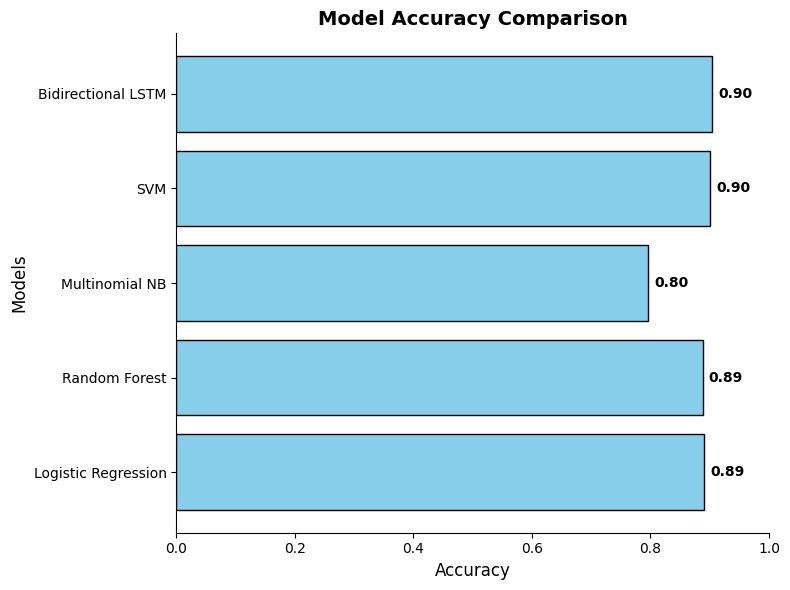

                 Model  Accuracy
0  Logistic Regression  0.891063
1        Random Forest  0.888441
2       Multinomial NB  0.796248
3                  SVM  0.900746
4   Bidirectional LSTM  0.904293


In [30]:
#Graphical and tabular comparison of accuracies of all the models
import matplotlib.pyplot as plt
import pandas as pd

# List of models and their accuracies
models = ['Logistic Regression', 'Random Forest', 'Multinomial NB', 'SVM', 'Bidirectional LSTM']
accuracies = [accuracy_lr, accuracy_rf, accuracy_nb, accuracy_svm]

# Calculate the accuracy of the Bidirectional LSTM model
loss, accuracy_bidirectional = model2.evaluate(X_test, y_test)
accuracies.append(accuracy_bidirectional)

# Create a horizontal bar plot for model accuracy
plt.figure(figsize=(8, 6))
plt.barh(models, accuracies, color='skyblue', edgecolor='black')
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Models', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xlim(0, 1)  # Set the x-axis limits from 0 to 1
plt.gca().spines['top'].set_visible(False)  # Remove top border
plt.gca().spines['right'].set_visible(False)  # Remove right border

# Add values at the end of each bar
for i, v in enumerate(accuracies):
    plt.text(v + 0.01, i, f'{v:.2f}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Create a tabular comparison of accuracy
data = {'Model': models, 'Accuracy': accuracies}
df_accuracy = pd.DataFrame(data)
print(df_accuracy)
